# Project  for General Assembly Data Science class Fall 2016: 
# Can we predict student success? 

## The source: Apex Learning Virtual School - an online high school preparing students for college, work, and life

## The project: Do we have factors in our data that are predictive of students obtaining a passing grade in an ALVS course?

## The data:
* Enrollments for ALVS for classes taking place August 2014 - July 2016.
* Each record represents an ALVS course purchased, whether by a student taking a class on her own or by a school purchasing and providing course content for its students.
* Information available about each course includes the subject, the points available, the number of assignments, and the student's final grade.
* A data dictionary exists to assist in interpretation of the features.
* The project will seek to identify factors in the data that predict whether a student achieved a passing grade in the course.

In [1]:
# TODO - Go through import dependencies and remove the ones I didn't use
import numpy as np
import math
import pandas as pd
#import seaborn as sns - seaborn not installed on this computer but also not needed
import matplotlib.pyplot as plt
import random
import csv
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV

## Note that the source data file used below is a version that was modified separately, using Pandas, to anonymize the data. The code used to perform the anonymization is available in the notebook named "Anonymize_Data_Notebook."

In [2]:
# read in Excel file; use col 1 ("EnrollmentID") as index
enr = pd.read_excel('ALVS_Enrollments_SY14-16_Anon.xlsx', index_col=0)

In [3]:
enr.shape

(33593, 117)

### In the next few cells, I converted the column names to a list so I could slice through them and explore what kinds of variables I had available.

#### Some promising variables from that review:
* OnSchedulePercent'
* u'GradeToDate',
* u'LetterGradeToDate',
* u'OverallGrade',
* u'OverdueActivities',
* u'TotalPointsEarnedOnActivitiesDueToNow',
* u'TotalPointsPossibleDueToNow',
* u'TotalPointsEarnedOnActivities',
* u'TotalPointsAttempted',
* u'TotalPointsPossible',
* u'ExtraCredit',
* u'NumOfScoredActivitiesByCourse',
* u'NumOfScoredActivitiesCompletedByCourse',

In [4]:
col_list = list(enr.columns)

In [5]:
col_list[:20]

['LastDueDate',
 'Extension_Granted',
 'ExtensionDate',
 'EnrollmentCount',
 'ProductTypeID',
 'UniverseName',
 'UniverseID',
 'TopParentOrgName',
 'TopParentOrgID',
 'ParentOrgName',
 'ParentOrgID',
 'OrgName',
 'OrgState',
 'OrgID',
 'OrgType',
 'SchoolYear',
 'TimePeriodName',
 'Semester',
 'SemesterID',
 'TrackName']

In [6]:
col_list[21:50]

['CommonCore',
 'ProductCode',
 'ProductName',
 'SectionID',
 'ClassroomName',
 'ClasssroomIsActive',
 'ClassroomArchiveDate',
 'ClassroomArchived',
 'ClassroomID',
 'CopiedSection',
 'ProgramID',
 'ProgramCode',
 'ProgramName',
 'ClassroomEcode',
 'ImportClassroomID',
 'IsProctored',
 'SpecialScheduleIND',
 'EnrollmentStatus',
 'EnrollmentStatusTypeID',
 'EnrollmentStatusALHS',
 'EnrollmentStatusALHSID',
 'EnrollmentDate',
 'StudentStartDate',
 'ClassroomStartDate',
 'ALHSPaidEnrollment',
 'Started',
 'Served',
 'EnrollmentDays',
 'Readiness']

In [7]:
col_list[51:80]

['StartedThree',
 'CourseDurationDays',
 'DaysSinceStart',
 'CreditStatusCategory',
 'LastLogin',
 'FirstAccessed',
 'LastAccessed',
 'DaysSinceLastAccess',
 'TotalTimeSpentOnCourse_Hours',
 'TotalTimeSpentOnCourse_Minutes',
 'TotalTimeSpentOnCourse',
 'LA28',
 'Dropped',
 'EffectiveWithdrawalDate',
 'WithdrawalDate',
 'WithdrawReason',
 'WithdrawCreditStatus',
 'FinalGrade',
 'GradeTranslation',
 'Passing',
 'ValidGrade',
 'CompletionDate',
 'CompletionDaysOld',
 'CompletionDaysNew',
 'QualityOfWork',
 'Progress',
 'OnSchedulePercent',
 'GradeToDate',
 'LetterGradeToDate']

In [8]:
col_list[81:110]

['TeacherCustomerID',
 'TeacherEnrollID',
 'TeacherEnrollmentStatusTypeID',
 'TeacherLastLogin',
 'MentorLastLogin',
 'SCLastLogin',
 'ActivityCountComplete',
 'ActivityCountTotal',
 'ActivityCompletePerc',
 'ActivityCountDueToNow',
 'ActivityCountCompleteDueToNow',
 'OverdueActivities',
 'TotalPointsEarnedOnActivitiesDueToNow',
 'TotalPointsPossibleDueToNow',
 'TotalPointsEarnedOnActivities',
 'TotalPointsAttempted',
 'TotalPointsPossible',
 'ExtraCredit',
 'NumOfScoredActivitiesByCourse',
 'NumOfScoredActivitiesCompletedByCourse',
 'TotalPointsPossible_Non_ModifiedCourseWithDiagExcluded',
 'TotalPointsPossible_Non_ModifiedCourse',
 'TotalPointsPossible_ModifiedCourse_TeacherScoredWork',
 'TotalPointsPossible_ModifiedCourse_ComputerScoredWork',
 'TotalPointsPossible_ModifiedCourse',
 'TotalPointsExcluded',
 'NON_DIAG_Points_Excluded',
 'TotalPointsEarned_TeacherScoredActivities',
 'TotalPointsEarned_ComputerScoredActivities']

In [9]:
col_list[111:len(col_list)+1]

['ExcusedPoints',
 'Count_of_Teacher_Excluded_Activities',
 'ALHS_Pathway',
 'ALHSWithdrawnFC',
 'Unnamed: 136',
 'Anon_Student_ID']

## How many students completed the course?
## At this stage I want to explore only those students.
Future exploration could be done on progress throughout a course, but that would require combining data week-over-week or month-over-month for the same course and same student. 

At this stage of the project the simplest option is to look at students who completed the course, examine if their final grade was a passing grade, and then try to identify factors that are associated with a passing grade.

In [4]:
enr.groupby('EnrollmentStatus').count()

,LastDueDate,Extension_Granted,ExtensionDate,EnrollmentCount,ProductTypeID,UniverseName,UniverseID,TopParentOrgName,TopParentOrgID,ParentOrgName,...,NON_DIAG_Points_Excluded,TotalPointsEarned_TeacherScoredActivities,TotalPointsEarned_ComputerScoredActivities,TestOutPoints,ExcusedPoints,Count_of_Teacher_Excluded_Activities,ALHS_Pathway,ALHSWithdrawnFC,Unnamed: 136,Anon_Student_ID
EnrollmentStatus,,,,,,,,,,,,,,,,,,,,,
Active,694,33,33,716,716,716,716,716,716,716,...,687,687,687,716,716,687,716,0,0,716
Complete,26525,2780,3598,28064,28064,28064,28064,28058,28058,28064,...,15322,15322,15322,28064,28064,15322,28064,0,0,28064
EnrollmentStatus,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
Withdrawn,3946,117,188,4812,4812,4812,4812,4801,4801,4812,...,2516,2516,2516,4812,4812,2516,4812,0,0,4812


In [4]:
# Create dataframe of only those students who completed the course
enr_complete = enr[enr['EnrollmentStatus'] == 'Complete']

In [5]:
# Confirm the filter worked and the df only includes completed students
enr_complete.EnrollmentStatus.value_counts()

Complete    28064
Name: EnrollmentStatus, dtype: int64

In [6]:
enr_complete.shape

(28064, 117)

### Encode and pre-process data

In [7]:
# Response variable 'Passing' is a True/False field. Create a numeric 0/1 field for it.
# Use lambda anonymous function to apply 1 if True, else 0
enr_complete['Passing_binary'] = enr_complete['Passing'].apply(lambda x: 1 if x else 0)

# Subject could be a valid identifier but it's text (Electives, English, Math, etc.)
# Create dummy encoding for subject
subject_dummies = pd.get_dummies(enr_complete.SubjectName, prefix='Subject')
enr_complete = pd.concat([enr_complete, subject_dummies], axis=1)
# Correct issue with subject dummies having a space in them for two of the subjects
enr_complete = enr_complete.rename(columns={'Subject_World Language': 'Subject_World_Language', 
                                            'Subject_Social Studies':'Subject_Social_Studies'})

# 'StartedThree' measures if a student started working on the course within three days of the course starting
# StartedThree is a Yes/No field. Create a numeric 0/1 field for it.
enr_complete['StartedThree_binary'] = enr_complete['StartedThree'].map({'No':0,'Yes':1})

# Create binary for Extension_Granted
ext_granted_dict = {'YES':1, np.nan:0}

# Create indicator ID for ALHS_Pathway, TrackName, SchoolYear, OrgType
# For these columns, first create a list from the values in column
# Then make a set from it to remove duplicates
# Create a dictionary to map each track name to an integer
# Then complete the mapping
pathways = list(set([i for i in enr_complete['ALHS_Pathway']]))
pathways_dict = {pathway:i+1 for (i, pathway) in enumerate(pathways)}
tracks = [i for i in enr_complete['TrackName']]
tracks = list(set(tracks))
track_dict = {track: i+1 for (i, track) in enumerate(tracks)}
school_years = [i for i in enr_complete['SchoolYear']]
school_years = list(set(school_years))
school_years_dict = {i:int(i[3:5]) for i in school_years}
org_types = [i for i in enr_complete['OrgType']]
org_types = list(set(org_types))
org_type_dict = {org:i+1 for (i, org) in enumerate(org_types)}
program_codes = list(set([i for i in enr_complete['ProgramCode']]))
program_codes_dict = {code:int(code[1:]) for code in program_codes}

# Create new column in dataframe for indicators using dicts created
enr_complete['ALHS_Pathway_Ind'] = enr_complete.ALHS_Pathway.map(pathways_dict, na_action='ignore')
enr_complete['Ext_Granted_Ind'] = enr_complete.Extension_Granted.map(ext_granted_dict, na_action='ignore')
enr_complete['Ext_Granted_Ind'].fillna(value=0, inplace=True)
enr_complete['Track_Ind'] = enr_complete.TrackName.map(track_dict, na_action='ignore')
enr_complete['Track_Ind'].fillna(value=0, inplace=True)
enr_complete['School_Year_Ind'] = enr_complete.SchoolYear.map(school_years_dict, na_action='ignore')
enr_complete['School_Year_Ind'].fillna(value=0, inplace=True)
enr_complete['Org_Type_Ind'] = enr_complete.OrgType.map(org_type_dict, na_action='ignore')
enr_complete['Org_Type_Ind'].fillna(value=0, inplace=True)
enr_complete['Program_Code_ID'] = enr_complete.ProgramCode.map(program_codes_dict, na_action='ignore')

/Users/jasondixon/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


### Examine two features that may be duplicates of each other

In [8]:
enr_complete[['ActivityCompletePerc', 'OnSchedulePercent']]
# Is Activity Complete Perc always less than OnSchedulePerc?
# Determine number of instances when it is
# Have to turn OnSchedulePerc into an actual percentage (currently 0-100) so it compares correctly to ActivityCompletePerc
len(enr_complete[enr_complete['ActivityCompletePerc'] < enr_complete['OnSchedulePercent']/100])
# Find difference
compl_percent_df = enr_complete[enr_complete['ActivityCompletePerc'] > enr_complete['OnSchedulePercent']/100]
# Find difference and then average difference in percentages
complete_diffs = enr_complete['ActivityCompletePerc'] - enr_complete['OnSchedulePercent']/100
complete_diffs.mean()

-0.033304553876850565

### On average, the OnSchedulePercent column is 3% higher than the ActivityCompletePerc column.
### This is a close enough difference that I'm comfortable dropping one of them (OnSchedulePercent).

### Reduce dimensions based on data knowledge and analysis (including above research on OnSchedulePercent).

In [9]:
"""
There are around 140 features in the data set, so need to reduce features.
First, compile list of features that excludes info like unique identifiers, 
columns known from knowledge of data not to contain valid info, etc.
Also drop date columns that won't be used in analysis 
(semester ID or school year more important time identifiers than exact date)
Also drop 'OnSchedulePerc' based on analysis above

"""
remove_cols = ['LastDueDate', 'EnrollmentCount', 'UniverseName', 'TopParentOrgName', 
               'ParentOrgName', 'OrgName', 'Semester', 'CommonCore', 'ProductName', 
               'ClassroomName', 'ClasssroomIsActive', 'ClassroomArchiveDate', 
               'ClassroomArchived', 'ClassroomID', 'CopiedSection','ProgramID',
               'ProgramName', 'ClassroomEcode', 'ImportClassroomID', 'IsProctored', 
               'SpecialScheduleIND', 'EnrollmentStatus','EnrollmentStatusTypeID', 
               'EnrollmentStatusALHS', 'EnrollmentStatusALHSID','ALHSPaidEnrollment', 
               'Started', 'Served','TotalTimeSpentOnCourse_Hours','TotalTimeSpentOnCourse_Minutes',
               'TotalTimeSpentOnCourse', 'LA28', 'Dropped', 'EffectiveWithdrawalDate', 
               'WithdrawalDate', 'WithdrawReason','WithdrawCreditStatus', 'FinalGrade', 
               'CreditStatusCategory','CompletionDaysOld','CompletionDaysNew', 
               'GradeToDate','LetterGradeToDate','TeacherEnrollID','TeacherEnrollmentStatusTypeID', 
               'TeacherLastLogin','MentorLastLogin','SCLastLogin','ActivityCountDueToNow',
               'ActivityCountCompleteDueToNow','TotalPointsEarnedOnActivitiesDueToNow', 
               'TotalPointsPossibleDueToNow','NON_DIAG_Points_Excluded', 'ALHSWithdrawnFC', 
               'Unnamed: 136', 'SubjectName', 'ProgramCode', 'EnrollmentDate','StudentStartDate', 
               'ClassroomStartDate','LastLogin', 'FirstAccessed', 'LastAccessed',
               'GradeTranslation', 'Passing', 'ValidGrade','CompletionDate', 'QualityOfWork',
               'Progress', 'OverallGrade','ALHS_Pathway', 'StartedThree', 'ProductCode', 
               'OrgState', 'TimePeriodName', 'OrgType','SchoolYear','TrackName', 
               'ExtensionDate', 'Readiness','Extension_Granted', 'OnSchedulePercent']

# Remaining columns for verification
remain_cols = ['ProductTypeID','UniverseID','TopParentOrgID','ParentOrgID','OrgID', 
               'SemesterID', 'SectionID',   'EnrollmentDays',  'StartToFirstAccessDays',
               'CourseDurationDays','DaysSinceStart',  'DaysSinceLastAccess', 'TeacherCustomerID', 
               'ActivityCountComplete','ActivityCountTotal', 'ActivityCompletePerc', 
               'OverdueActivities', 'TotalPointsEarnedOnActivities', 'TotalPointsAttempted',
               'TotalPointsPossible', 'ExtraCredit', 'NumOfScoredActivitiesByCourse', 
               'NumOfScoredActivitiesCompletedByCourse', 
               'TotalPointsPossible_Non_ModifiedCourseWithDiagExcluded',
               'TotalPointsPossible_Non_ModifiedCourse', 
               'TotalPointsPossible_ModifiedCourse_TeacherScoredWork',
               'TotalPointsPossible_ModifiedCourse_ComputerScoredWork',
               'TotalPointsPossible_ModifiedCourse', 
               'TotalPointsExcluded', 'TotalPointsEarned_TeacherScoredActivities',
               'TotalPointsEarned_ComputerScoredActivities', 'TestOutPoints', 'ExcusedPoints', 
               'Count_of_Teacher_Excluded_Activities', 'Anon_Student_ID','Subject_Electives', 
               'Subject_English', 'Subject_Math', 'Subject_Science', 'Subject_Social Studies',
               'Subject_World Language','StartedThree_binary', 'Passing_binary']

In [10]:
# Confirm original dataframe shape
print(enr_complete.shape)

(28064, 131)


In [11]:
# Drop the columns that aren't needed to reduce size of dataframe
enr_compl_reduced = enr_complete.drop(remove_cols,axis=1)

In [12]:
# Verify original dataframe was unaffected
print(enr_complete.shape)
# Verify new dataframe dimensions
print(enr_compl_reduced.shape)
# Confirm column count is as expected
print(enr_complete.shape[1] - len(remove_cols))

(28064, 131)
(28064, 49)
49


In [13]:
# After encoding done above, all columns should be numeric, so can fill na's with 0
enr_compl_reduced.fillna(0, inplace=True)
# Determine if there are any nan's left
enr_compl_reduced.isnull().any().any()

False

In [14]:
# Rearrange columns to put response variable at end ('Passing_binary)
# Store in new variable for easier referencing
cols_at_end = ['Passing_binary']
df = enr_compl_reduced[[c for c in enr_compl_reduced if c not in cols_at_end] 
                            + [c for c in cols_at_end if c in enr_compl_reduced]]
print(df.shape)
df.head()

(28064, 49)


,ProductTypeID,UniverseID,TopParentOrgID,ParentOrgID,OrgID,SemesterID,SectionID,EnrollmentDays,StartToFirstAccessDays,CourseDurationDays,...,Subject_Social_Studies,Subject_World_Language,StartedThree_binary,ALHS_Pathway_Ind,Ext_Granted_Ind,Track_Ind,School_Year_Ind,Org_Type_Ind,Program_Code_ID,Passing_binary
EnrollmentID,,,,,,,,,,,,,,,,,,,,,
24795034,30,1,2634111,2634111,3049824,1,2479038,87,0,124,...,0.0,0.0,1,3,0,1,14,9,9874452,1
25126391,30,1,2634111,2634111,3049824,1,2507690,67,0,124,...,0.0,1.0,1,1,0,1,14,9,9874452,1
25239780,30,1,2634111,2634111,3049824,1,2422182,7,0,124,...,0.0,1.0,1,1,0,1,14,9,9874452,1
25261395,30,1,2634111,2634111,3049824,1,2524468,5,1,124,...,0.0,0.0,1,3,0,1,14,9,9874452,1
25261399,30,1,2634111,2634111,3049824,1,2524471,5,0,124,...,0.0,0.0,1,3,0,1,14,9,9874452,1



## Build initial feature and response spaces (X and y).

In [15]:
# Build initial X and y
# Response variable y will be indicator of whether student passed or not
y = df.Passing_binary
# Initial feature list is all columns except the y column
X = df[list(df.columns)[:-1]]
print(X.shape, y.shape)

(28064, 48) (28064,)


In [17]:
# Construct frequency table for response variable
pd.DataFrame(y.value_counts())

,Passing_binary
1,20075
0,7989


In [18]:
pd.DataFrame(y.value_counts() / np.sum(y.value_counts()))

,Passing_binary
1,0.715329
0,0.284671


### The null value for this dataset is .7153. That is, if we predicted an enrollment would pass, without any other information, we would be right about 72% of the time. We want any models we build to have a higher accuracy than the null.

## The problem is a classification one -- we are trying to correctly predict whether a particular enrollment has a passing grade (class 1) or not (class 0).

### Models suitable for classification problems that we will build include logistic regression, k-nearest neighbors, and decision trees. We will also leverage the variance-reducing capability of random forests.

### Preparing Data for Logistic Regression

Although all features are numeric, to interpret a logistic regression model the numbers need to be meaningful (i.e., either binary or continuous).
* For example, 'Org ID' is a number indicating the organization, but the number is just an indicator - 1500 is not more than 1000 but just indicates a different org. This type of variable is not suitable for logistic regression, although it may be useful for other models, like decision trees.
* Solution: create feature list with meaningful numeric values only. Note that this new feature space may not be necessary for all models.

In [19]:
numeric_cols = ['EnrollmentDays',  'StartToFirstAccessDays',
               'CourseDurationDays','DaysSinceStart',  'DaysSinceLastAccess', 'ActivityCountComplete','ActivityCountTotal', 'ActivityCompletePerc', 
               'OverdueActivities', 'TotalPointsEarnedOnActivities', 'TotalPointsAttempted',
               'TotalPointsPossible','ExtraCredit', 'NumOfScoredActivitiesByCourse', 
               'NumOfScoredActivitiesCompletedByCourse', 
               'TotalPointsPossible_Non_ModifiedCourseWithDiagExcluded',
               'TotalPointsPossible_Non_ModifiedCourse', 
               'TotalPointsPossible_ModifiedCourse_TeacherScoredWork',
               'TotalPointsPossible_ModifiedCourse_ComputerScoredWork',
               'TotalPointsPossible_ModifiedCourse', 
               'TotalPointsExcluded', 'TotalPointsEarned_TeacherScoredActivities',
               'TotalPointsEarned_ComputerScoredActivities', 'TestOutPoints', 'ExcusedPoints', 
               'Count_of_Teacher_Excluded_Activities', 'Subject_Electives', 
               'Subject_English', 'Subject_Math', 'Subject_Science', 'Subject_Social Studies',
               'Subject_World Language','StartedThree_binary', 'Passing_binary']

In [20]:
# Create new dataframe with numeric columns only
drop_cols = [c for c in list(df.columns) if c not in numeric_cols]
print("Number of columns to drop: {}".format(len(drop_cols)))
df_num = df.drop(drop_cols, axis=1)
print("Original shape of DataFrame: {}".format(df.shape))
print("Shape of new DataFrame: {}".format(df_num.shape))
# Check that no columns were missed
print("Check: {} should match original shape of dataframe".format(df_num.shape[1] + len(drop_cols)))
df_num.head()

Number of columns to drop: 17
Original shape of DataFrame: (28064, 49)
Shape of new DataFrame: (28064, 32)
Check: 49 should match original shape of dataframe


,EnrollmentDays,StartToFirstAccessDays,CourseDurationDays,DaysSinceStart,DaysSinceLastAccess,ActivityCountComplete,ActivityCountTotal,ActivityCompletePerc,OverdueActivities,TotalPointsEarnedOnActivities,...,TotalPointsEarned_ComputerScoredActivities,TestOutPoints,ExcusedPoints,Count_of_Teacher_Excluded_Activities,Subject_Electives,Subject_English,Subject_Math,Subject_Science,StartedThree_binary,Passing_binary
EnrollmentID,,,,,,,,,,,,,,,,,,,,,
24795034,87,0,124,506,399,68,68,1.00,0,1792.0,...,0.0,0.0,0,0,0.0,0.0,0.0,1.0,1,1
25126391,67,0,124,499,437,46,46,1.00,0,1571.0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1,1
25239780,7,0,124,534,466,49,49,1.00,0,1572.0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1,1
25261395,5,1,124,534,410,73,73,1.00,0,2435.0,...,0.0,0.0,0,0,0.0,0.0,1.0,0.0,1,1
25261399,5,0,124,534,509,81,82,0.99,0,2838.0,...,0.0,0.0,0,0,0.0,0.0,1.0,0.0,1,1


In [21]:
# Create X and y based on new dataframe
y = df_num.Passing_binary
# Feature list is all columns except the y column
X = df_num[list(df_num.columns)[:-1]]
print(df_num.shape)
print(X.shape, y.shape)

(28064, 32)
(28064, 31) (28064,)


## Build and evaluate models.

### Logistic Regression

In [22]:
# Construct and evaluate logistic regression model on new feature space
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())
print(logreg)

0.939734926084
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [29]:
# Fit the data in order to extract the coefficients
# Steps to get coeffs:
# * first call logreg.fit(X,y)
# * then call logreg.coef_
# If you just call crossval(logreg) then logref_coef_ won't be accessible

logreg.fit(X,y)
# Confirm I have a coefficient for each column
print(len(logreg.coef_[0]))
print(len(X.columns))

31
31


In [30]:
# Zip list of coeffs and create dict of coeff: feature
coeff_dict = {}
for i, f in zip(list(logreg.coef_[0]),X.columns):
    coeff_dict[i] = f
# Create list of coeffs so can display them in sorted order
ordered_coeffs = sorted(list(coeff_dict.keys()))

for coeff in ordered_coeffs:
    print(coeff, coeff_dict[coeff])

-0.0258083824744 TotalPointsPossible
-0.00340525626204 OverdueActivities
-0.00339822925983 EnrollmentDays
-0.00252381594617 DaysSinceStart
-0.00246028194671 TotalPointsPossible_Non_ModifiedCourse
-0.00133347502908 Count_of_Teacher_Excluded_Activities
-0.00120772130125 TotalPointsPossible_ModifiedCourse
-0.000236746175794 Subject_Math
8.02882332819e-05 ActivityCompletePerc
0.000164177384132 Subject_Electives
0.000165405288465 Subject_English
0.000511599213194 Subject_Science
0.000551908771475 TotalPointsPossible_ModifiedCourse_TeacherScoredWork
0.00059787837929 TotalPointsAttempted
0.000660185157183 DaysSinceLastAccess
0.0010568243084 TotalPointsPossible_Non_ModifiedCourseWithDiagExcluded
0.00112382329913 TestOutPoints
0.00136448150219 TotalPointsPossible_ModifiedCourse_ComputerScoredWork
0.00157150597529 NumOfScoredActivitiesByCourse
0.00187774565244 NumOfScoredActivitiesCompletedByCourse
0.00196306065586 TotalPointsExcluded
0.0019757845894 TotalPointsEarned_ComputerScoredActivities
0.

### The coefficients are small but there is a range, specifically from -0.026 to 0.064. 
### The log-reg coefficients indicate the association between a change of one unit in each feature and the log odds of the record belonging to class 1 (in this case, having a passing grade). 

### More extreme coefficients ultimately indicate a higher probability of a change in that feature being associated with our class of interest (class 1).

### Features with the most extreme negative coefficients: 
* -0.0258083824744 TotalPointsPossible
  *  Each point fewer that is possible is associated with a higher log odds of passing.
* -0.00340525626204 OverdueActivities
  *  Each fewer overdue activity (i.e., activity a student hasn't done) is associated with a higher log odds of passing.
* -0.00339822925983 EnrollmentDays
* -0.00252381594617 DaysSinceStart
* -0.00246028194671 TotalPointsPossible_Non_ModifiedCourse
  * Per the data dictionary this feature should match TotalPointsPossible per ALVS policy, although it is not clear under what circumstances it may not. Clearly it is not equal to that feature, however, because otherwise it should have an identical coefficient. This may indicate a data quality or data understanding issue.



### Features with the most extreme positive coefficients:
* 0.00247930739542 StartedThree_binary
  * This feature measures whether a student started work on a course within three days of the course start date.
  * It was created from a yes/no field and encoded as 0=no and 1=yes.
  * Because it is not continuous, it's not clear how to interpret it in terms of unit change since a one-unit change means going from 0 to 1, and the only values possible are 0 and 1.
  * However, the bottom line is that a student starting work on a course within three days of the course start date (and therefore having a value of 1 for this feature) is associated with a higher log odds of the student passing the course.
* 0.0129367590766 CourseDurationDays
  * This feature is a number of days assigned by the backend team enrolling the student in the course and is the number of days the course is expected to take in a typical term. The field may or may not be changed, since it controls the due dates and final exam date for the course.
  * The value of the field is subject to change, for example if a student is given an extension or requests due dates to be moved up (due dates control whether activities are available, so if students work ahead they have to request due dates be changed before being able to complete scored activities).
  * The positive coefficient can be interpreted as indicating an association between the number of days in the course and the likelihood of the student passing.
  * It is interesting that a feature like Enrollment Days, above, had a negative coefficient while Course Duration Days had a positive coefficient. The former is a feature measuring the number of days from the time the student was enrolled in the course (enrollment is done before the class starts, so it is not a measure of the length of time a course took to complete).
* 0.0265056464681 ExcusedPoints
* 0.0427748050863 TotalPointsEarnedOnActivities
* 0.064010594592 ExtraCredit

### The model is predictive, but understanding the strength of the coefficients isn't easy. We will see if the features associated with more extreme coefficients appear in other models. 

### We may  have to explore whether or not the assumptions of logistic regression were met before continuing to attempt to interpret the results. However, we will plot an ROC curve to see if that metric supports this as a good model.

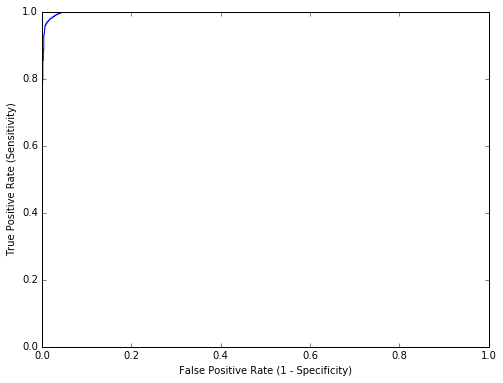

In [50]:
# Use test-train split to split data and then predict probability of passing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_prob = logreg.predict_proba(X_test)[:, 1]
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 10
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [51]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.998411103562


## Although the plot is hard to see, the area under the curve is near 1, which is exactly what is desired on an ROC curve.

## Now we will move to some other models and assess their performance and interpretability.

### K-Nearest Neighbors

#### Note: KNN requires scaling of features.

In [66]:
# Use cross-validation to find best value of k
# Use pipeline to standardize data within the CV
# WARNING - TAKES AWHILE!!!!
# Due to time it takes, using cv=5 instead of 10

scaler = StandardScaler()
k_dict = {}
for k in range(1,35):
    knn = make_pipeline(scaler, KNeighborsClassifier(n_neighbors=k))
    score = cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()
    k_dict[score] = k

k_dict[max(sorted(list(k_dict.keys())))]

10

In [68]:
best_k = k_dict[max(sorted(list(k_dict.keys())))]
print(best_k, k_dict[best_k])

In [102]:
# Use value of K found above to run model on scaled data and find score.
knn = make_pipeline(scaler, KNeighborsClassifier(n_neighbors=best_k))
score = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()
print(score)

0.931832682208


In [70]:
# To assess impact of scaling, calculate KNN accuracy on unscaled data
knn = KNeighborsClassifier(n_neighbors=best_k)
score = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()
print(score)

0.671924952527


## The scaled KNN model had only slightly less accuracy than the linear regression model (93.97% versus 93.18%). How will decision trees do?

### Decision Trees and Random Forests

In [52]:
# Construct decision trees of different max depths and evaluate.

# Construct decision tree with max depth of 3 and calculate score
treeclf = DecisionTreeClassifier(max_depth = 3, random_state=1)
treeclf.fit(X, y)
treeclf.score(X,y)

0.94786915621436718

In [53]:
# Display the feature importances
tree_impt = pd.DataFrame({'feature':X.columns, 
                          'importance':treeclf.feature_importances_}).sort_values('importance', ascending=False)
tree_impt[tree_impt['importance'] != 0]

,feature,importance
8,OverdueActivities,0.894130
9,TotalPointsEarnedOnActivities,0.059672
7,ActivityCompletePerc,0.046198


In [54]:
# Construct decision tree with max depth of 5 with score
treeclf = DecisionTreeClassifier(max_depth = 5, random_state=1)
treeclf.fit(X, y)
treeclf.score(X,y)

0.96778791334093506

In [55]:
# Display the feature importances
tree_impt = pd.DataFrame({'feature':X.columns, 
                       'importance':treeclf.feature_importances_}).sort_values('importance', ascending=False)

tree_impt[tree_impt['importance'] != 0]

,feature,importance
8,OverdueActivities,0.830717
9,TotalPointsEarnedOnActivities,0.069121
7,ActivityCompletePerc,0.043595
11,TotalPointsPossible,0.032974
15,TotalPointsPossible_Non_ModifiedCourseWithDiag...,0.016850
24,ExcusedPoints,0.002760
28,Subject_Math,0.001529
16,TotalPointsPossible_Non_ModifiedCourse,0.000931
20,TotalPointsExcluded,0.000603
18,TotalPointsPossible_ModifiedCourse_ComputerSco...,0.000440


In [56]:
# Construct decision tree with max depth of 10
treeclf = DecisionTreeClassifier(max_depth = 10, random_state=1)
treeclf.fit(X, y)
treeclf.score(X,y)

0.98998717217787913

In [57]:
# Display the feature importances
tree_impt = pd.DataFrame({'feature':X.columns, 
                          'importance':treeclf.feature_importances_}).sort_values('importance', ascending=False)

tree_impt[tree_impt['importance'] != 0]

,feature,importance
8,OverdueActivities,0.754825
9,TotalPointsEarnedOnActivities,0.093053
11,TotalPointsPossible,0.056789
7,ActivityCompletePerc,0.040660
15,TotalPointsPossible_Non_ModifiedCourseWithDiag...,0.023209
12,ExtraCredit,0.004274
4,DaysSinceLastAccess,0.002896
24,ExcusedPoints,0.002496
22,TotalPointsEarned_ComputerScoredActivities,0.002378
3,DaysSinceStart,0.002358


## The decision tree with a max depth of 10 produced the best results. But, as scikit learn's docs page indicates: Decision trees tend to overfit on data with a large number of features. Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit...Remember that the number of samples required to populate the tree doubles for each additional level the tree grows to."
Credit: http://scikit-learn.org/stable/modules/tree.html

## The number of samples is not much of a concern for our data but the overfitting warning is one to keep in mind. A random forest classifier may do just as good of a job of predicting out of bag samples without overfitting, so we'll try that model next.

In [58]:
# Construct random forest
rfcl = RandomForestClassifier(n_estimators=150, max_features=10, oob_score=True, random_state=1)
rfcl.fit(X, y)
rfcl.score(X, y)
print("Score: {}".format(rfcl.score(X,y)))
print("OOB Score: {}".format(rfcl.oob_score_))

Score: 0.9995011402508552
OOB Score: 0.9812214937286203


In [96]:
# Display feature importances
rf_importance = pd.DataFrame({'feature':X.columns, 
                              'importance':rfcl.feature_importances_}).sort_values('importance', ascending=False)
# display features with highest importance percentages
rf_importance[rf_importance['importance'] > rf_importance.importance.mean()]

,feature,importance
8,OverdueActivities,0.326741
7,ActivityCompletePerc,0.228409
9,TotalPointsEarnedOnActivities,0.150906
10,TotalPointsAttempted,0.064200
14,NumOfScoredActivitiesCompletedByCourse,0.040390


### The performance of the random forest model is very good - 99.95%. The out-of-bag score is also very high at 98%. 

### We'll use grid search to find optimum parameters for number of tress to build (n_estimators) and number of features to consider when choosing best split (max_features).

In [59]:
rfcl = RandomForestClassifier(oob_score=True, random_state=1)
n_trees_range = range(1,150)
n_features_range = range(1,10)
param_grid = {"n_estimators":n_trees_range,
              "max_features":n_features_range}

# Try Randomized CV Grid Search first
n_iter_search = 20
random_search = RandomizedSearchCV(rfcl, param_distributions=param_grid,
                                   n_iter=n_iter_search)
random_search.fit(X, y)

print("Best score: {}".format(random_search.best_score_))
print("Best parameters: {}".format(random_search.best_params_))

/Users/jasondixon/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jasondixon/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jasondixon/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jasondixon/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliab

Best score: 0.9268457810718358
Best parameters: {'max_features': 1, 'n_estimators': 41}


In [112]:
# Use above parameters as guide for constructing a more thorough search using grid search

# ###### WARNING - VERY SLOW!!!!

n_estimators_range = list(range(1,51))
max_features_range = list(range(1,11))
param_dict = {"n_estimators":n_estimators_range,
              "max_features":max_features_range}

grid = GridSearchCV(rfcl, param_grid=param_dict)
grid.fit(X, y)
print("Best score: {}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))

/Users/jasondixon/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jasondixon/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jasondixon/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jasondixon/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliab

Best score: 0.930088369441277


/Users/jasondixon/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


NameError: name 'best_params_' is not defined

### Due to the large performance hit of grid search, and the fact that its best score was not really any better than the randomized grid search (.9300 vs. .9261), it's probably best to prefer randomized grid search for any additional parameter tuning.

## Find optimal features.

### Several of the models built perform well. However, there are quite a lot of features in the data set, and it's not clear that they are all needed. Can we eliminate features in order to identify the most important features for prediction? From a performance standpoint, fewer features would also allow more parameter tuning.

### Use recursive feature elimination and KBest to identify best predictive features

In [53]:
# Rebuild X and y using original dataframe with all numeric features
y = df.Passing_binary
X = df[list(df.columns)[:-1]]
print(X.shape, y.shape)

(28064, 48) (28064,)


In [54]:
# Note that pipe didn't work for scaler
# Split data and standardize/scale it
# Note: Standardizing on whole dataset is usually discouraged

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

logreg = LogisticRegression()
selector = RFE(logreg, 5, step=1)
selector = selector.fit(X_train_std, y_train)
selector.support_

log_reg_rfe_features = []

for i, v in enumerate(selector.support_):
    if v:
        log_reg_rfe_features.append(X.columns[i])

log_reg_rfe_features

['OverdueActivities',
 'TotalPointsEarnedOnActivities',
 'TotalPointsPossible',
 'NumOfScoredActivitiesByCourse',
 'NumOfScoredActivitiesCompletedByCourse']

In [55]:
# SelectKBest - Select features according to the k highest scores.
# Returns single array with scores for each feature. 
# Default function for score is is f_classif; see scikit learn docs for addl scoring functions. 
# Note: The default function only works with classification tasks.

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit(X, y)
k_best_features = []

for i, v in enumerate(X_new.get_support()):
    if v:
        k_best_features.append(X.columns[i])

k_best_features

['ActivityCompletePerc',
 'OverdueActivities',
 'TotalPointsEarnedOnActivities',
 'TotalPointsAttempted',
 'NumOfScoredActivitiesCompletedByCourse']

In [56]:
# Make list of all features identified
reduced_feature_list = list(set(log_reg_rfe_features + k_best_features))
reduced_feature_list

['TotalPointsEarnedOnActivities',
 'TotalPointsAttempted',
 'OverdueActivities',
 'TotalPointsPossible',
 'NumOfScoredActivitiesCompletedByCourse',
 'ActivityCompletePerc',
 'NumOfScoredActivitiesByCourse']

In [57]:
# Find features that are only in both lists
best_of_both = []

for f1 in log_reg_rfe_features:
    if f1 in k_best_features and f1 not in best_of_both:
        best_of_both.append(f1)

best_of_both

['OverdueActivities',
 'TotalPointsEarnedOnActivities',
 'NumOfScoredActivitiesCompletedByCourse']

In [58]:
# Use new name for best_of_both for reference elsewhere
features_top_3 = best_of_both.copy()

### Run models again with the reduced features and compare scores.

In [59]:
# Reconstruct X and y
y = df.Passing_binary
X_top3 = df[features_top_3]
print(df.shape)
print(X_top3.shape, y.shape)

(28064, 49)
(28064, 3) (28064,)


In [60]:
# Previous score was 0.931832682208
knn = make_pipeline(scaler, KNeighborsClassifier(n_neighbors=10))
score = cross_val_score(knn, X_top3, y, cv=10, scoring='accuracy').mean()
print(score)

0.95930480791


In [61]:
# Previous score was 0.939734926084
logreg = make_pipeline(scaler, LogisticRegression())
print(cross_val_score(logreg, X_top3, y, cv=10, scoring='accuracy').mean())
print(logreg)

0.950824519366
Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


In [62]:
# Reinstantiate estimators
scaler = StandardScaler()
logreg = LogisticRegression()

# pipe doesn't work when try to get coefficients
# Standardize data and then fit log reg model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Fit data to get coefficients
logreg.fit(X_train_std, y_train)

for coeff, feature in zip(logreg.coef_[0], X.columns):
    print(coeff, feature)

0.0439503543146 ProductTypeID
-0.0919537232577 UniverseID
0.0170681016498 TopParentOrgID
-0.11889755456 ParentOrgID
-0.107771333064 OrgID
0.405304305789 SemesterID
-0.737949512613 SectionID
-0.176270088512 EnrollmentDays
0.0997996098693 StartToFirstAccessDays
0.299136083833 CourseDurationDays
-0.266476270985 DaysSinceStart
0.0501797038834 DaysSinceLastAccess
0.00618379181134 TeacherCustomerID
-0.64418889717 ActivityCountComplete
0.516267568528 ActivityCountTotal
-0.139964373416 ActivityCompletePerc
-1.98810226365 OverdueActivities
14.8609790882 TotalPointsEarnedOnActivities
1.01688900516 TotalPointsAttempted
-5.53977763283 TotalPointsPossible
1.07624775032 ExtraCredit
0.516267568528 NumOfScoredActivitiesByCourse
-0.64418889717 NumOfScoredActivitiesCompletedByCourse
-1.03118501997 TotalPointsPossible_Non_ModifiedCourseWithDiagExcluded
-1.31700747148 TotalPointsPossible_Non_ModifiedCourse
-0.308845421412 TotalPointsPossible_ModifiedCourse_TeacherScoredWork
0.00614655622984 TotalPointsPos

## Interpretation of Feature List

### The project is to understand what features are predictive of students passing, but the purpose of knowing that is to find out if there are aspects of a student's performance that can be early indicators of a need for intervention or that can be communicated to students as motivation to act.

### In that spirit, knowing that "Total Points Earned" is predictive of success isn't that informative, because points earned are ultimately what determines the course grade and the course grade determines if a student passes. The message for that feature is "make a good grade and you'll pass."

### However, knowing that the number of Overdue Activities (i.e., work a student doesn't do) is predictive IS helpful. The message is "Do the work and you're more likely to pass."  The difference is subtle, but it's important to point out that the points earned aren't the only or most predictive aspect of a student's progress. If the student does the work, chances of passing go up.

### The fact that Activity Complete Percentage, Num of Scored Activities Completed by Course, and Total Points Attempted are also among the most predictive features of passing support that interpretation.

### What happens to our predictive power if we remove "Total Points Earned"?

In [63]:
reduced_feature_list.remove("TotalPointsEarnedOnActivities")
reduced_feature_list

['TotalPointsAttempted',
 'OverdueActivities',
 'TotalPointsPossible',
 'NumOfScoredActivitiesCompletedByCourse',
 'ActivityCompletePerc',
 'NumOfScoredActivitiesByCourse']

In [64]:
X = df[reduced_feature_list]
y = y = df.Passing_binary

In [65]:
# Previous score was 0.95930480791
knn = make_pipeline(scaler, KNeighborsClassifier(n_neighbors=10))
score = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()
print(score)

0.943696414317


In [66]:
# Previous score was 0.950824519366
logreg = make_pipeline(scaler, LogisticRegression())
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())
print(logreg)

0.94676170753
Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


In [67]:
# Fit to get coefficients
# Reinstantiate estimators
scaler = StandardScaler()
logreg = LogisticRegression()

# pipe doesn't work when try to get coefficients
# Standardize data and then fit log reg model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Fit data to get coefficients
logreg.fit(X_train_std, y_train)

for coeff, feature in zip(logreg.coef_[0], X.columns):
    print(coeff, feature)

5.99260569658 TotalPointsAttempted
-3.71425272238 OverdueActivities
-3.97802879854 TotalPointsPossible
-3.08635048134 NumOfScoredActivitiesCompletedByCourse
0.316641046553 ActivityCompletePerc
2.65484281413 NumOfScoredActivitiesByCourse


In [68]:
# Construct random forest
# Previous score 0.9268457810718358 using randomized grid search
# Previous score with max features=10 & estimators=150 was 0.9995011402508552 (OOB Score: 0.9812214937286203)


# max_features = auto uses sqrt(n_features)
rfcl = RandomForestClassifier(n_estimators=150, max_features='auto', oob_score=True, random_state=1)
rfcl.fit(X, y)
rfcl.score(X, y)
print("Score: {}".format(rfcl.score(X,y)))
print("OOB Score: {}".format(rfcl.oob_score_))

Score: 0.9806157354618016
OOB Score: 0.9497576966932725


In [70]:
# Display feature importances
rf_importance = pd.DataFrame({'feature':X.columns, 
                              'importance':rfcl.feature_importances_}).sort_values('importance', ascending=False)

# display importance percentages
print(rf_importance)

# display features with highest importance percentages (above the mean)
rf_importance[rf_importance['importance'] > rf_importance.importance.mean()]

                                  feature  importance
1                       OverdueActivities    0.361088
4                    ActivityCompletePerc    0.314780
0                    TotalPointsAttempted    0.148948
3  NumOfScoredActivitiesCompletedByCourse    0.101412
2                     TotalPointsPossible    0.040957
5           NumOfScoredActivitiesByCourse    0.032816


,feature,importance
1,OverdueActivities,0.361088
4,ActivityCompletePerc,0.314780


In [71]:
# Construct random forest
# max_features = None uses up to all features
rfcl = RandomForestClassifier(n_estimators=150, max_features=None, oob_score=True, random_state=1)
rfcl.fit(X, y)
rfcl.score(X, y)
print("Score: {}".format(rfcl.score(X,y)))
print("OOB Score: {}".format(rfcl.oob_score_))

Score: 0.9806157354618016
OOB Score: 0.9496864310148233


In [72]:
# Display feature importances
rf_importance = pd.DataFrame({'feature':X.columns, 
                              'importance':rfcl.feature_importances_}).sort_values('importance', ascending=False)

# display importance percentages
print(rf_importance)

# display features with highest importance percentages (above the mean)
rf_importance[rf_importance['importance'] > rf_importance.importance.mean()]

                                  feature  importance
1                       OverdueActivities    0.763891
4                    ActivityCompletePerc    0.107528
0                    TotalPointsAttempted    0.061336
2                     TotalPointsPossible    0.030952
3  NumOfScoredActivitiesCompletedByCourse    0.020653
5           NumOfScoredActivitiesByCourse    0.015641


,feature,importance
1,OverdueActivities,0.763891


### Random forest models provide the most predictive power for the feature list.
* When all features are used, Overdue Activities dominates the feature importance percentages.
* When 2 or 3 features are used (sqrt(n_features)), Overdue Activities and Activity Complete Percentage are the most importance features.

### In terms of predicting student's likelihood of passing, completing the assignments (activity complete perc) and not getting behind (overdue activities) are the best predictors.

### Efforts to influence student behavior should focus on these aspects of the course.


### There are several paths this research could go next:

* Time-series analysis - For this project we took data on whether or not students passed a course and then looking back at feature values for the entire course. It might be instructive to examine week-over-week or month-over-month data for the same student and the same course. That type of analysis might reveal transition points - for example a certain threshold of overdue activities or a certain number of degree of worsening performance - that are predictive of failure to pass.

* Examine points rather than just pass/fail - For this project we coded pass as a binary variable and predicted the classification of the course record into either class. The actual points earned in the course are available, so we could examine that continuous variable and apply regression modeling techniques to attempt to predict course grade.